# Load Libraries and Functions

In [1]:
# System, Data, Time, and Spec Libraries
import os
import pandas as pd
import time
import random
from datetime import datetime, timedelta
import numpy as np 
from line_profiler import LineProfiler  # Code peformance
profiler = LineProfiler()
import warnings
warnings.filterwarnings('ignore')
import csv
#pd.set_option('display.max_colwidth', None)
import multiprocess as mp
num_cores = mp.cpu_count()

# Data Visualization Libraries
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px
import seaborn as sns
#from pandas.io.json import json_normalize  # Older version
from pandas import json_normalize  # Newer version
from pandas.plotting import parallel_coordinates


# Natural Language Processing Libraries
import json
import requests
import xml.etree.ElementTree as ET
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import string
import nltk
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from pandas import json_normalize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.util import ngrams
from nltk.corpus import stopwords
from string import punctuation
punctuation = set(punctuation)
punctuation.update({'_', '-','‘'})
english_words = set(words.words())
from fuzzywuzzy import process
#nltk.download('words')
#nltk.download('punkt')
#nltk.download('stopwords')

# SQL Interface Libraries
import pymysql as mysql
import mysql.connector
import pyodbc
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import event
from string import punctuation

# Machine Learning Libraries
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error, f1_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve, plot_cumulative_gain
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import specificity_score, sensitivity_score
from imblearn.under_sampling import RandomUnderSampler
from scikitplot.metrics import plot_lift_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from dmba import stepwise_selection, classificationSummary, backward_elimination
from sklearn.decomposition import PCA
from sklearn.utils.random import sample_without_replacement
from sklearn.metrics import precision_score, recall_score

# Importing Custom Functions
import nbimporter
from Functions import nan_info

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

no display found. Using non-interactive Agg backend


# Test Join Outside of Database

In [2]:
# df1 = pd.read_csv('C://Users/halee/Downloads/events_table2024.csv')
# df2 = pd.read_csv('C://Users/halee/Downloads/drugs_table2024_prep.csv')
# # Merge df1 and df2
# merged_df1_df2 = pd.merge(df1, df2, on='event_id', how='inner')
# merged_df1_df2.drop(['patient_drug_id'], axis = 1, inplace = True)
# merged_df1_df2.drop_duplicates(inplace=True)
# merged_df1_df2.head(20)

In [3]:
nan_info(merged_df1_df2)

NameError: name 'merged_df1_df2' is not defined

In [6]:
merged_df1_df2['ndc9'] = merged_df1_df2['ndc9'].astype(str)
merged_df1_df2['ndc9'].head()

NameError: name 'merged_df1_df2' is not defined

In [7]:
with_drugs = merged_df1_df2[['event_id', 'expedited', 'age', 'sex', 'weight', 'report_source', 'ndc9', 'serious_outcome']].drop_duplicates(subset='event_id')

NameError: name 'merged_df1_df2' is not defined

In [244]:
with_drugs.head()

,event_id,expedited,age,sex,weight,report_source,ndc9,serious_outcome
0,1,1,39.0,2,112.00,1,502420040.0,1
55,2,1,57.0,1,74.00,1,502420040.0,1
83,3,2,44.0,2,61.22,1,9309224.0,1
86,4,1,65.0,2,57.00,3,502420135.0,1
97,5,1,42.0,2,50.00,3,502420135.0,1


In [245]:
with_drugs.to_csv('C://Users/halee/Downloads/with_drugs_sample2024.csv', index = False)

### SQL Password

In [4]:
PASSWORD  = 'PASSWORD' 

## Investigate number of records in each database table

In [5]:
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="pharma_db"
)

cursor = connection.cursor()
sql_query = """SELECT COUNT(*) FROM patient_reactions"""


cursor.execute(sql_query)
result = cursor.fetchall()
column_names = [i[0] for i in cursor.description]


result_query_df = pd.DataFrame(result, columns=column_names)

cursor.close()
connection.close()

result_query_df

,COUNT(*)
0,118510


# Get Dataset from SQL Database

In [6]:
# Connect to the MySQL server
connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="pharma_db"
)

# Create a cursor object
cursor = connection.cursor()

In [7]:
# # Master Query from Data - goal

# master_query = """SELECT 
#                 a.serious_outcome,
#                 a.expedited,
#                 a.age,
#                 a.sex,
#                 a.year
#                 a.weight
#                 r.outcome,
#                 p.unit_price,
#                 p.generic_brand,
#                 l.ingredients,
#                 l.rxcui,
#                 l.set_id,
#                 d.manu_num,
#                 d.unii
#             FROM adverse_events a 
#                 INNER JOIN patients_reactions r ON a.event_id = r.event_id 
#                 INNER JOIN patients_drugs d ON r.event_id = d.event_id 
#                 INNER JOIN prices p ON d.ndc11 = p.ndc11
#                 INNER JOIN lables l ON p.ndc11 = l.ndc11
#             ORDER BY a.event_id DESC"""  # Still need to test and figure out

# Read in data from csv OR

In [8]:
master_query_df = pd.read_csv('DataLibrary/result_query_df.csv')

# option 2- Read in data from SQL

In [52]:
start_time = time.time()

connection = mysql.connector.connect(
    host="localhost", user="root", password=PASSWORD, database="pharma_db"
)

cursor = connection.cursor()
sql_query = """SELECT 
d.med_product,
d.event_id,
d.manu_num,
a.serious_outcome,
a.expedited,
a.age,
a.sex,
a.year,
a.weight,
a.report_source,
r.outcome,
d.ndc9
FROM adverse_events a 

INNER JOIN patient_reactions r ON a.event_id = r.event_id
INNER JOIN patient_drugs d ON a.event_id = d.event_id
ORDER BY a.event_id DESC
"""
cursor.execute(sql_query)
result = cursor.fetchall()
column_names = [i[0] for i in cursor.description]
master_query_df = pd.DataFrame(result, columns=column_names)

cursor.close()
connection.close()


end_time = time.time()
execution_time = end_time - start_time
print(execution_time)


master_query_df = master_query_df.drop_duplicates()

master_query_df.head(10)


master_query_df.to_csv('DataLibrary/result_query_2024.csv')

155.85505604743958


In [53]:
master_query_df.shape

(83307, 12)

In [54]:
master_query_df.head()

,med_product,event_id,manu_num,serious_outcome,expedited,age,sex,year,weight,report_source,outcome,ndc9
0,['xolair'],20885,1,1,1,25,1,2024,95,3,Unknown,502420040
8,['aspirin'],20885,153,1,1,25,1,2024,95,3,Unknown,476820456
9,['xolair'],20885,1,1,1,25,1,2024,95,3,Recovering,502420040
27,['aspirin'],20885,153,1,1,25,1,2024,95,3,Recovering,476820456
66,['xolair'],20885,1,1,1,25,1,2024,95,3,NotRecovered,502420040


In [55]:
#master_query_df.to_csv('DataLibrary/result_query_df.csv')

In [56]:
master_query_df.shape

(83307, 12)

# Make dataset smaller for testing

# Preparation for Data Split

In [67]:
#with_drugs = pd.read_csv('/Users/vicky/Downloads/with_drugs_sample2024.csv')

### Define numerical, text, and categorical variables

In [68]:
#with_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20885 entries, 0 to 20884
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_id         20885 non-null  int64  
 1   expedited        20885 non-null  int64  
 2   age              20885 non-null  float64
 3   sex              20885 non-null  int64  
 4   weight           20885 non-null  float64
 5   report_source    20885 non-null  int64  
 6   ndc9             18983 non-null  float64
 7   serious_outcome  20885 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [31]:
result_query_df = master_query_df

In [33]:
result_query_df.shape

(83307, 11)

In [57]:
cats = ['sex', 'expedited', 'report_source', 'ndc9']
nums = ['weight', 'age']  # Took out year since data will all be from recent 3 months of data 
all_vars = cats+nums

#Define outcome as categorical
result_query_df['serious_outcome'] = result_query_df['serious_outcome'].astype('category')

result_query_df.head()

,med_product,event_id,manu_num,serious_outcome,expedited,age,sex,year,weight,outcome,ndc9
0,['xolair'],20885,1,1,1,25,1,2024,95,Unknown,502420040
18,['aspirin'],20885,153,1,1,25,1,2024,95,Unknown,476820456
76,['xolair'],20885,1,1,1,25,1,2024,95,Recovering,502420040
94,['aspirin'],20885,153,1,1,25,1,2024,95,Recovering,476820456
266,['xolair'],20885,1,1,1,25,1,2024,95,NotRecovered,502420040


### Create Transformation Pipeline

### One Hot Encode Drug Names for Full Dataset before Splitting - using NDC9 since there is only one per row

In [36]:
# need to do 


In [37]:
# # Create a categorical processing pipeline that uses one-hot encoding
# # Dropping binary columns and drop first of each level** NEED TO ADD**
# cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])

# # Create a numerical processing pipeline that uses skewness correction/center/scale.
# num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# # Create a text token processing step to vectorize tokens
# #text_pipe = Pipeline([('vector', tf_idf function())])

# # Combine pipeline steps
# all_pipe = ColumnTransformer(
#     transformers=[
#         ('cat', cat_pipe, cats),
#         ('num', num_pipe, nums)
#         # ('text', text_pipe, texts)  # Apply text pipeline if you have text columns
#     ],
#     verbose_feature_names_out=False
# )
# # Verify steps
# all_pipe

# Split Data into Training/Validation/Testing

In [58]:
master_query_df = pd.read_csv('DataLibrary/result_query_2024.csv')

In [59]:
master_query_df.shape

(83307, 13)

### Make a Subset of the Dataset for Initial Model Training

In [60]:
# Split the data into features (X) and the target variable (y).
X = master_query_df[all_vars]

#Define outcome variable
y = master_query_df[['serious_outcome']]

#Split data
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.8, random_state = 2)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state = 2)

In [61]:
X_train.shape, y_train.shape

((66645, 6), (66645, 1))

In [62]:
y_train.value_counts()

serious_outcome
1                  46637
2                  17317
0                   2691
dtype: int64

In [63]:
X_val.shape, y_val.shape

((8331, 6), (8331, 1))

In [64]:
X_test.shape, y_test.shape

((8331, 6), (8331, 1))

## Encode Categorical Variables (other than drugs) & Standardize Numerical Variables

In [65]:
#Initialize encoders
encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
scaler = StandardScaler()

In [66]:
# Fit the encoder on X so all possible categories are captured, even if they are only in training or testing
encoder.fit(X_train[cats])
scaler.fit(X_train[nums])


StandardScaler()

In [67]:
#Initialize encoders
encoder = OneHotEncoder(drop='if_binary', sparse=False,handle_unknown='ignore')
scaler = StandardScaler()

# Fit the encoder on X so all possible categories are captured, even if they are only in training or testing
encoder.fit(X[cats])
scaler.fit(X_train[nums])


def transform_data(data):
    # Apply one-hot encoding to categorical features
    encoded_features = encoder.transform(data[cats])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cats))
    
    # Apply standardization to numerical features
    standardized_features = scaler.transform(data[nums])
    standardized_df = pd.DataFrame(standardized_features, columns=nums)
    
    # Concatenate the standardized numerical features with the encoded categorical features
    return pd.concat([data.drop(cats + nums, axis=1).reset_index(drop=True),
                      standardized_df.reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

In [68]:
# Apply the transformation to all datasets
X_train_encoded = transform_data(X_train)
X_val_encoded = transform_data(X_val)
X_test_encoded = transform_data(X_test)
X_test_encoded.head()

,weight,age,sex_2,expedited_1,expedited_2,expedited_5,report_source_1,report_source_2,report_source_3,ndc9_200152,...,ndc9_7359409301,ndc9_7467605902,ndc9_7632901912,ndc9_7632903318,ndc9_7632908261,ndc9_7948100090,ndc9_8076200021,ndc9_8215400449,ndc9_8224301001,ndc9_8322200200
0,-1.067765,-2.049919,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.423929,0.785213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.234171,-0.557744,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.638119,1.232865,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.292309,0.238082,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scale Numerical Only Since Sex already Binary (when using limited dataset, "no_drugs_sample) (already completed in encoding function)

In [69]:
# def transform_nums(data):
#     encoded_df = pd.DataFrame(scaler.fit_transform(data[nums]),
#                 columns = scaler.get_feature_names_out().tolist())
#     return pd.concat([encoded_df.reset_index(drop=True), data.drop(columns=nums).reset_index(drop=True)], axis=1)

# X_train_encoded = transform_nums(X_train_encoded)
# X_train_encoded.head()

# X_val_encoded = transform_nums(X_val_encoded)
# X_val_encoded.head()

# X_test_encoded = transform_nums(X_test_encoded)
# X_test_encoded.head()

In [70]:
#Fit pipeline to resampled data
#X_train_fit = all_pipe.fit_transform(X_train)
#Get feature names out from fit and create as new list

#def get_feature_names(column_transformer):
#    feature_names = []
#    for name, transformer, columns in column_transformer.transformers:
#        if hasattr(transformer, 'get_feature_names_out'):
#             feature_names.extend(transformer.get_feature_names_out())
#         else:
#             feature_names.extend(columns)  # Use original columns if transformer does not provide feature names
#     return feature_names

# # Extract feature names
# feature_names = get_feature_names(all_pipe)


# #X_train_cols = X_train_fit.get_feature_names_out().tolist()
# X_train_pipe = pd.DataFrame(all_pipe.fit_transform(X_train), columns = X_train_cols)

In [71]:
# #Apply pipeline to all of X
# X_test_fit = all_pipe.fit(X_test)
# #Get feature names out from fit and create as new list
# # X_test_cols = X_test_fit.get_feature_names_out().tolist()
# X_test_pipe = pd.DataFrame(all_pipe.fit_transform(X_test), columns = X_cols)

In [72]:
# #Apply pipeline to all of X
# X_val_fit = all_pipe.fit(X_val)
# #Get feature names out from fit and create as new list
# X_val_cols = X_val_fit.get_feature_names_out().tolist()
# X_val_pipe = pd.DataFrame(all_pipe.fit_transform(X_val), columns = X_cols)

## Resampling Techniques - UnderSampling

In [73]:
y_train.value_counts()

serious_outcome
1                  46637
2                  17317
0                   2691
dtype: int64

In [74]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
# Define the sampling strategy to balance all classes
sampling_n = {0: y_train.value_counts()[0], 1: y_train.value_counts()[0], 2: y_train.value_counts()[0]}
rus = RandomUnderSampler(random_state = 1, sampling_strategy=sampling_n )

# Perform random under-sampling on the training dataset
X_train_under, y_train_under = rus.fit_resample(X_train_encoded, y_train)

In [75]:
X_train_under.shape, y_train_under.shape

((8073, 1756), (8073, 1))

In [76]:
y_train_under.value_counts()

serious_outcome
0                  2691
1                  2691
2                  2691
dtype: int64

# Multiclass Classification Model Training

#### Evalutation Metrics Function

In [77]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import os

def evaluate_model(model, X_test, y_test, labels, model_name):

    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, labels=labels)
    recall = recall_score(y_test, y_pred, average=None, labels=labels)
    f1 = f1_score(y_test, y_pred, average=None, labels=labels)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    # Calculate specificity for each class
    specificity = np.array([
        (np.sum(cm) - np.sum(cm[:, i]) - np.sum(cm[i, :]) + cm[i, i]) / (np.sum(cm) - np.sum(cm[:, i]))
        for i in range(len(labels))
    ])
    
    # Round metrics to three decimal places
    accuracy = round(accuracy, 3)
    precision = np.round(precision, 3)
    recall = np.round(recall, 3)
    f1 = np.round(f1, 3)
    specificity = np.round(specificity, 3)
    
    # Prepare data for DataFrame
    rows = []
    for i, label in enumerate(labels):
        rows.append({
            'model': model_name,
            'class': label,
            'accuracy': accuracy,
            'precision': precision[i],
            'recall': recall[i],
            'f1_score': f1[i],
            'specificity': specificity[i]
        })
    
    # Create DataFrame
    metrics_df = pd.DataFrame(rows)
    
    # Create the ConfusionMatrices directory if it does not exist
    folder_path = 'ClassificationMatrices'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Store the confusion matrix heatmap image
    img_path = os.path.join(folder_path, f'confusion_matrix_{model_name}.png')
    
    # Define axis labels
    axis_labels = ['Not Serious', 'Serious', 'Death']  # Replace with actual labels if different
    
    # Create the heatmap
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                     xticklabels=axis_labels, yticklabels=axis_labels,
                     annot_kws={"size": 11})
    
    # Set labels and title with larger font sizes
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title(f'Classification Matrix Heatmap for {model_name}', fontsize=16)
    
    # Adjust the size of the tick labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust x-tick labels font size
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Adjust y-tick labels font size
    
    plt.tight_layout()
    
    # Save the plot to an image file
    plt.savefig(img_path)
    plt.close()  # Close the plot to free up memory
    
    return metrics_df, img_path, y_pred


## White Box Models

### Logistic Regression L1 Regularization

#### Generate and Fit Model on Training Data

In [78]:
log_l1 = LogisticRegression(solver='saga', penalty='l1', random_state=1)
log_l1.fit(X_train_under, y_train_under)

LogisticRegression(penalty='l1', random_state=1, solver='saga')

#### Fit Model on Testing Data, Model Performance Metrics

In [79]:
model_name = 'log_l1'

# Run model on test data, generate confusion matrix, save y_pred
log_l1_metrics_df, log_l1_img_path, log_l1_y_pred = evaluate_model(log_l1, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

log_l1_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,log_l1,0,0.677,0.564,0.939,0.705,0.997
1,log_l1,1,0.677,0.837,0.677,0.749,0.478
2,log_l1,2,0.677,0.450,0.636,0.527,0.852


#### Get Probabilities for AUC curve

In [131]:
log_l1_y_pred_proba = log_l1.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

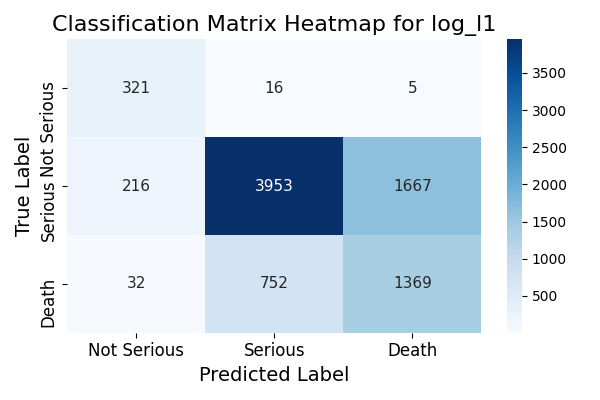

In [80]:
display(Image(filename=log_l1_img_path))

#### Other Model Metrics - Model Coefficient Odds for Each Outcome

In [81]:
def get_model_coefficients_and_odds(data, model_name, top_n=5):
    outcomes = ['Non-Serious', 'Serious', 'Death']
    result = {}

    for i, outcome in enumerate(outcomes):
        # Intercept
        intercept_data = {'Feature': ['Intercept'], 'LogOdds': [model_name.intercept_[i]]}
        intercept_df = pd.DataFrame(intercept_data)
        intercept_df['Odds'] = np.exp(intercept_df['LogOdds'])

        # Coefficients
        coef_data = {'Feature': data.columns, 'LogOdds': model_name.coef_[i]}
        coef_df = pd.DataFrame(coef_data)
        coef_df = coef_df.reindex(coef_df['LogOdds'].abs().sort_values(ascending=False).index)
        coef_df['Odds'] = np.exp(coef_df['LogOdds'])

        # Combine intercept and coefficients
        df = pd.concat([intercept_df, coef_df])
        
        result[outcome] = df.head(top_n + 1)

    return result

In [82]:
coefficients_and_odds = get_model_coefficients_and_odds(X_train_under, log_l1)
for outcome, df in coefficients_and_odds.items():
     print(f"Top features for {outcome}:")
     print(df)

Top features for Non-Serious:
             Feature   LogOdds        Odds
0          Intercept  1.584920    4.878903
1287  ndc9_684620226  4.969552  143.962337
306    ndc9_17300909  4.672150  106.927392
755   ndc9_502420150  4.534617   93.187802
1426  ndc9_722870310  4.187399   65.851258
3        expedited_1 -3.961319    0.019038
Top features for Serious:
             Feature   LogOdds       Odds
0          Intercept -0.375423   0.686998
1521  ndc9_782060145  2.827081  16.896061
1294  ndc9_687270100  2.548179  12.783807
105     ndc9_2405908 -1.444541   0.235854
956   ndc9_595720515  1.382138   3.983408
422    ndc9_40906660  1.374680   3.953812
Top features for Death:
              Feature   LogOdds       Odds
0           Intercept -1.209497   0.298347
1287   ndc9_684620226 -2.381482   0.092414
213      ndc9_7800846  2.354168  10.529366
1706  ndc9_6980000250 -2.093254   0.123285
732    ndc9_502420040 -2.083904   0.124443
146      ndc9_6900238 -1.972763   0.139072


### Logistic Regression L2 Regularization

#### Generate and Fit Model on Training Data

In [83]:
log_l2 = LogisticRegression(solver='saga', penalty='l2', random_state=1)
log_l2.fit(X_train_under, y_train_under)

LogisticRegression(random_state=1, solver='saga')

#### Fit Model on Testing Data, Model Performance Metrics

In [84]:
model_name = 'log_l2'

# Run model on test data, generate confusion matrix, save y_pred
log_l2_metrics_df, log_l2_img_path, log_l2_y_pred = evaluate_model(log_l2, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

log_l2_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,log_l2,0,0.675,0.562,0.930,0.700,0.997
1,log_l2,1,0.675,0.851,0.659,0.743,0.478
2,log_l2,2,0.675,0.451,0.680,0.542,0.864


#### Get Probabilities for AUC Curve

In [133]:
log_l2_y_pred_proba = log_l2.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

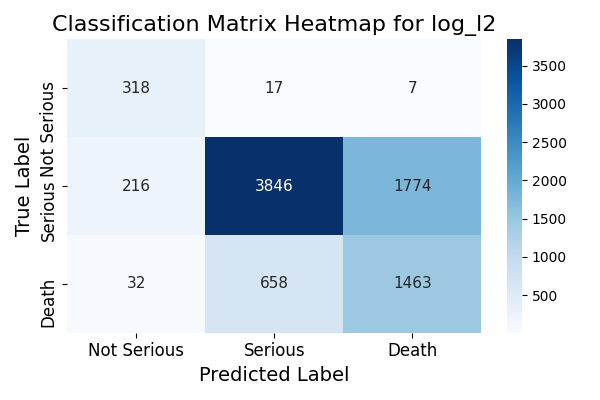

In [85]:
display(Image(filename=log_l2_img_path))

#### Other Metrics - Model Coefficient Odds for Each Outcome

In [86]:
coefficients_and_odds = get_model_coefficients_and_odds(X_train_under, log_l2)
for outcome, df in coefficients_and_odds.items():
     print(f"Top features for {outcome}:")
     print(df)

Top features for Non-Serious:
             Feature   LogOdds       Odds
0          Intercept  1.033100   2.809762
1287  ndc9_684620226  3.689085  40.008229
755   ndc9_502420150  3.489122  32.757173
306    ndc9_17300909  3.182281  24.101658
1426  ndc9_722870310  2.921064  18.561021
3        expedited_1 -2.668516   0.069355
Top features for Serious:
             Feature   LogOdds      Odds
0          Intercept -0.152397  0.858647
1294  ndc9_687270100  1.886777  6.598067
1521  ndc9_782060145  1.855574  6.395366
306    ndc9_17300909 -1.580367  0.205900
755   ndc9_502420150 -1.494340  0.224397
1034  ndc9_622070922 -1.397693  0.247166
Top features for Death:
              Feature   LogOdds      Odds
0           Intercept -0.880703  0.414492
1287   ndc9_684620226 -2.304491  0.099810
755    ndc9_502420150 -1.994782  0.136043
1701  ndc9_6923801146 -1.798845  0.165490
732    ndc9_502420040 -1.733055  0.176744
1426   ndc9_722870310 -1.678587  0.186638


### Logistic Regression Elastic Net

#### Grid Search

In [87]:
param_grid = {
    'l1_ratio': [i / 9 for i in range(10)],  # 10 values from 0 to 1 (0, 0.1, 0.2, ..., 1.0)
    'C': [0.01, 0.1, 1, 10, 100]  # Different strengths of regularization
}

# Initialize the Logistic Regression model with Elastic Net penalty
log_reg_elasticnet = LogisticRegression(
    penalty='elasticnet',  # Use Elastic Net regularization
    solver='saga',        # Solver that supports Elastic Net
    random_state=1
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg_elasticnet,
    param_grid=param_grid,
    scoring='accuracy',   # Or another metric of choice
    cv=5,                 # Number of cross-validation folds
    n_jobs=-1              # Use all available CPUs
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_under, y_train_under.values.ravel())

# Extract and print the best parameters and best score from grid search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_score = grid_search.best_score_
print(f"Best cross-validation score: {best_score:.3f}")

# Get the best model
elastic_net = grid_search.best_estimator_


Best parameters: {'C': 100, 'l1_ratio': 0.1111111111111111}
Best cross-validation score: 0.755


#### Generate and Fit Model on Training Data

In [88]:
elastic_net.fit(X_train_under, y_train_under)

/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-pack

LogisticRegression(C=100, l1_ratio=0.1111111111111111, penalty='elasticnet',
                   random_state=1, solver='saga')

#### Fit Model on Testing Data, Model Performance Metrics

In [89]:
model_name = 'elastic_net'

# Run model on test data, generate confusion matrix, save y_pred
elastic_net_metrics_df, elastic_net_img_path, elastic_net_y_pred = evaluate_model(elastic_net, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

elastic_net_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,elastic_net,0,0.678,0.548,0.944,0.694,0.998
1,elastic_net,1,0.678,0.858,0.657,0.744,0.481
2,elastic_net,2,0.678,0.457,0.694,0.551,0.870


#### Get Probabilities for AUC

In [126]:
elastic_net_y_pred_proba = elastic_net.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

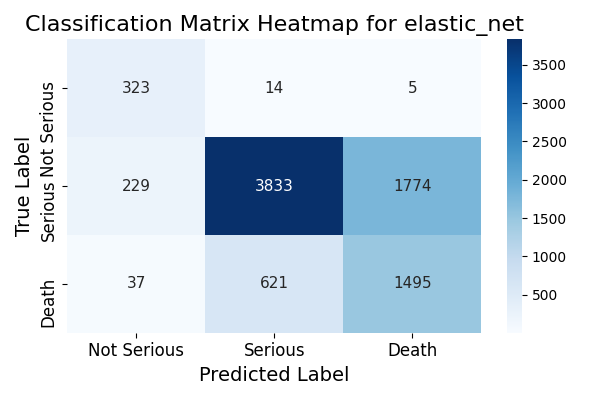

In [90]:
display(Image(filename=elastic_net_img_path))

#### Other Metrics - Model Coefficient Odds for Each Outcome

In [91]:
coefficients_and_odds = get_model_coefficients_and_odds(X_train_under, elastic_net)
for outcome, df in coefficients_and_odds.items():
     print(f"Top features for {outcome}:")
     print(df)

Top features for Non-Serious:
             Feature   LogOdds        Odds
0          Intercept  0.953197    2.593989
306    ndc9_17300909  4.944171  140.354430
1287  ndc9_684620226  4.820787  124.062653
1426  ndc9_722870310  4.123719   61.788598
755   ndc9_502420150  4.111136   61.016000
1140  ndc9_649800449  3.899967   49.400804
Top features for Serious:
             Feature   LogOdds       Odds
0          Intercept -0.160525   0.851697
1521  ndc9_782060145  3.305573  27.264148
1294  ndc9_687270100  3.268223  26.264618
306    ndc9_17300909 -2.459810   0.085451
956   ndc9_595720515  2.379894  10.803755
1411  ndc9_718940120 -2.252685   0.105117
Top features for Death:
              Feature   LogOdds       Odds
0           Intercept -0.792672   0.452634
1287   ndc9_684620226 -3.621257   0.026749
1701  ndc9_6923801146 -3.013788   0.049105
732    ndc9_502420040 -2.899411   0.055056
1426   ndc9_722870310 -2.753257   0.063720
425     ndc9_40909157  2.713376  15.080097


### Single Decision Tree

#### Grid Search

In [92]:
# Define a grid of hyperparameters to search for in tree
param_grid = {
    'max_depth' : [5,6,7,8,9,10],
    'min_samples_leaf' : [1,2,3,4,5,6]
    
}
# Create a GridSearchCV object using and the defined parameter grid
tree1_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)

# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree1_search.fit(X_train_under, y_train_under.values.ravel())

# Get the best hyperparameters found by the GridSearch
best_params = tree1_search.best_params_
print(f"Best parameters: {best_params}")

tree1 = tree1_search.best_estimator_


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4}


#### Generate and Fit Model on Training Data

In [93]:
tree1.fit(X_train_under, y_train_under)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=1)

#### Fit Model on Testing Data, Model Performance Metrics

In [94]:
model_name = 'tree1'

# Run model on test data, generate confusion matrix, save y_pred
tree1_metrics_df, tree1_img_path, tree1_y_pred = evaluate_model(tree1, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

tree1_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,tree1,0,0.802,0.593,0.895,0.713,0.995
1,tree1,1,0.802,0.886,0.827,0.855,0.650
2,tree1,2,0.802,0.653,0.720,0.685,0.899


#### Get Probabilities for AUC

In [134]:
tree1_y_pred_proba = tree1.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

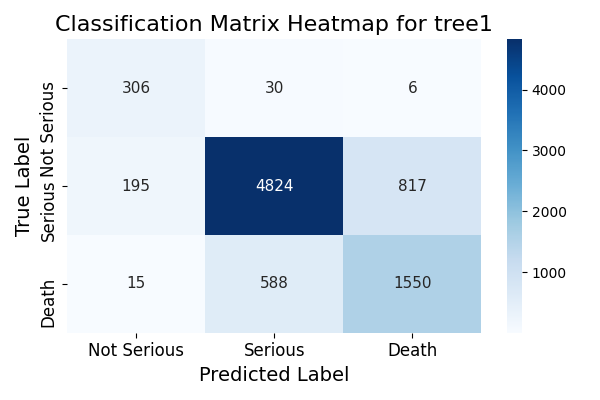

In [95]:
display(Image(filename=tree1_img_path))

#### Other Metrics - Feature Importance and Tree Structure

In [96]:
# Feature Importance Scores
# Extract feature importances
importances = tree1.feature_importances_
features = X_train_under.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for DecisionTreeClassifier')
plt.gca().invert_yaxis()  # To display the most important feature at the top
# Add labels to the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.4f}',
        va='center'
    )

plt.show()

/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-pack

In [97]:
from sklearn.tree import plot_tree
# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree1, filled=True, feature_names=X_train_under.columns, class_names=['NonSerious', 'Serious', 'Death'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()

/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-pack

In [98]:
#Plot max_depth = 2
from sklearn.tree import plot_tree
folder_path = 'ModelOutput'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
img_path = os.path.join(folder_path, 'tree1_maxdepth2.png')

# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree1, filled=True,max_depth=2, feature_names=X_train_under.columns, class_names=['NonSerious', 'Serious', 'Death'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()
plt.savefig(img_path)

/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vicky/opt/anaconda3/lib/python3.8/site-pack

In [99]:
#Plot max_depth = 1
from sklearn.tree import plot_tree
folder_path = 'ModelOutput'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
img_path = os.path.join(folder_path, 'tree1_maxdepth1.png')

# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(tree1, filled=True,max_depth=1, feature_names=X_train_under.columns, class_names=['NonSerious', 'Serious', 'Death'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()
plt.savefig(img_path)

## Ensembles

### Random Forest Classifier w/ 10-k CV

#### Grid Search

In [100]:
param_grid = {
    'n_estimators': [100, 125, 150, 175, 200]  # Example range for number of estimators
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Use accuracy as the scoring metric
                           n_jobs=-1,  # Use all available cores
                           verbose=2)  # Print progress messages

# Fit GridSearchCV to the data
grid_search.fit(X_train_under, y_train_under.values.ravel())

# Get the best model from the grid search
rf = grid_search.best_estimator_

rf.fit(X_train_under, y_train_under)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Example: Printing the best model parameters
print("Best Random Forest Model:")
print(rf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'n_estimators': 200}
Best Score: 0.8575502280740117
Best Random Forest Model:
RandomForestClassifier(n_estimators=200, random_state=1)


#### Fit Model on Testing Data, Model Performance Metrics

In [101]:
model_name = 'rf'

# Run model on test data, generate confusion matrix, save y_pred
rf_metrics_df, rf_img_path, rf_y_pred = evaluate_model(rf, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

rf_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,rf,0,0.842,0.616,0.968,0.753,0.999
1,rf,1,0.842,0.924,0.846,0.883,0.700
2,rf,2,0.842,0.712,0.809,0.757,0.930


#### Get Probabilities for AUC

In [135]:
rf_y_pred_proba = rf.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

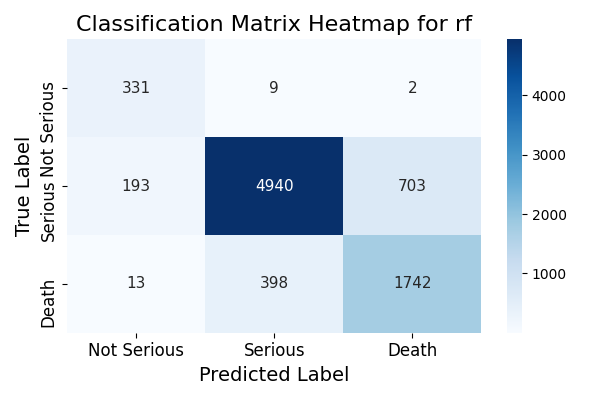

In [102]:
display(Image(filename=rf_img_path))

#### Other Metrics

### Gradient Boosted Tree w/ 10-k CV

#### Grid Search

In [112]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [5,6,7,8,9,10],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [50,75,100,125,150],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_search.best_params_

grboost = tree_search.best_estimator_


# Print the best parameters and the best score
print("Best Parameters:", tree_search.best_params_)
print("Best Score:", tree_search.best_score_)

# Example: Printing the best model parameters
print("Best Gradient Boosted Tree:")
print(grboost)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
Best Score: 0.8649841424662912
Best Gradient Boosted Tree:
GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=1)


#### Fit Model on Testing Data, Model Performance Metrics

In [113]:
model_name = 'grboost'

# Run model on test data, generate confusion matrix, save y_pred
grboost_metrics_df, grboost_img_path, grboost_y_pred = evaluate_model(grboost, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

grboost_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,grboost,0,0.85,0.604,0.947,0.738,0.998
1,grboost,1,0.85,0.927,0.857,0.891,0.716
2,grboost,2,0.85,0.732,0.816,0.772,0.933


#### Get probabilities for AUC

In [124]:
grboost_y_pred_proba = grboost.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

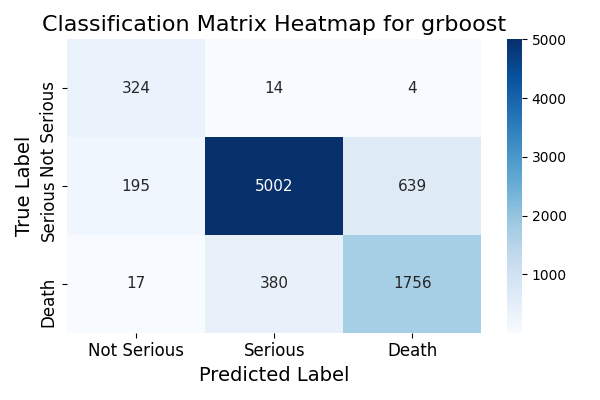

In [114]:
display(Image(filename=grboost_img_path))

#### Other Metrics

In [115]:
# Get feature importance scores
importances=grboost.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
     print(f"{feature}: {importance:.4f}")

Feature Importance Scores
expedited_1: 0.3774
weight: 0.2149
age: 0.1409
ndc9_502420150: 0.0373
ndc9_684620226: 0.0265
sex_2: 0.0159
report_source_1: 0.0098
report_source_3: 0.0087
ndc9_622070922: 0.0065
ndc9_722870310: 0.0055
ndc9_17300909: 0.0054
report_source_2: 0.0048
ndc9_724260118: 0.0037
ndc9_690970897: 0.0037
ndc9_6923801146: 0.0032
ndc9_649800449: 0.0029
ndc9_605363: 0.0024
ndc9_7800846: 0.0024
ndc9_433760322: 0.0023
ndc9_203002: 0.0023
ndc9_502420040: 0.0021
ndc9_6050506282: 0.0021
ndc9_621350442: 0.0019
ndc9_628560704: 0.0017
ndc9_1901323: 0.0015
ndc9_603026: 0.0015
ndc9_9307442: 0.0014
ndc9_502420060: 0.0013
ndc9_303734: 0.0013
ndc9_511440020: 0.0012
ndc9_718940120: 0.0012
ndc9_687270100: 0.0012
ndc9_59700143: 0.0012
ndc9_6768402000: 0.0012
ndc9_648960661: 0.0012
ndc9_6980000250: 0.0012
ndc9_655970406: 0.0011
ndc9_605055: 0.0011
ndc9_6900195: 0.0011
ndc9_5556609800: 0.0010
ndc9_502420917: 0.0010
ndc9_688170134: 0.0010
ndc9_292730401: 0.0010
ndc9_712880149: 0.0009
ndc9_74005

## Non-parametric

### K-Nearest Neighbors Classifier

#### Grid Search

In [110]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]  # Example range for number of neighbors
}

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid,
                               cv=5,  # Number of cross-validation folds
                               scoring='accuracy',  # Use accuracy as the scoring metric
                               n_jobs=-1,  # Use all available cores
                               verbose=2)  # Print progress messages

# Fit GridSearchCV to the data
grid_search_knn.fit(X_train_under, y_train_under.values.ravel())

# Get the best model from the grid search
knn = grid_search_knn.best_estimator_

# Print the best parameters and the best score
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", grid_search_knn.best_score_)

# Example: Printing the best model parameters
print("Best KNN Model:")
print(knn)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters for KNN: {'n_neighbors': 1}
Best Score for KNN: 0.8025509761721162
Best KNN Model:
KNeighborsClassifier(n_neighbors=1)


#### Fit Model on Testing Data, Model Performance Metrics

In [111]:
model_name = 'knn'

# Run model on test data, generate confusion matrix, save y_pred
knn_metrics_df, knn_img_path, knn_y_pred = evaluate_model(knn, X_test_encoded, y_test, labels=[0, 1, 2], model_name=model_name)

knn_metrics_df.head()

,model,class,accuracy,precision,recall,f1_score,specificity
0,knn,0,0.741,0.431,0.968,0.596,0.999
1,knn,1,0.741,0.900,0.716,0.798,0.551
2,knn,2,0.741,0.569,0.772,0.655,0.909


#### Get Probabilities for AUC

In [136]:
knn_y_pred_proba = knn.predict_proba(X_test_encoded)  # This should be a 2D array

#### View Classification Matrix

In [ ]:
display(Image(filename=knn_img_path))

#### Other Metrics

### Neural Network

In [ ]:
# train

In [ ]:
# feature importance

In [ ]:
# 

### Baseline

In [116]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_test_encoded, y_test)
baseline_metrics_df, baseline_img_path, _ = evaluate_model(
    baseline_model, X_test_encoded, y_test, labels=[0, 1, 2], model_name='Baseline'
)
baseline_metrics_df

,model,class,accuracy,precision,recall,f1_score,specificity
0,Baseline,0,0.701,0.000,0.0,0.000,0.959
1,Baseline,1,0.701,0.701,1.0,0.824,NaN
2,Baseline,2,0.701,0.000,0.0,0.000,0.742


# Performance Metrics Table

In [117]:
def display_model_metrics_table(metrics_dfs):
    # Concatenate all DataFrames
    combined_df = pd.concat(metrics_dfs, ignore_index=True)
    
    # Convert DataFrame to a list of lists for tabulate
    table = combined_df.values.tolist()
    
    # Get column headers from DataFrame
    headers = combined_df.columns.tolist()
    
    # Generate and print the table
    table_str = tabulate(table, headers, tablefmt='pretty')
    print(table_str)
    return combined_df

model_metrics = display_model_metrics_table([baseline_metrics_df,log_l1_metrics_df, log_l2_metrics_df, elastic_net_metrics_df,
                           tree1_metrics_df, rf_metrics_df, knn_metrics_df])  # grboost_metrics_df

+-------------+-------+----------+-----------+--------+----------+-------------+
|    model    | class | accuracy | precision | recall | f1_score | specificity |
+-------------+-------+----------+-----------+--------+----------+-------------+
|  Baseline   |   0   |  0.701   |    0.0    |  0.0   |   0.0    |    0.959    |
|  Baseline   |   1   |  0.701   |   0.701   |  1.0   |  0.824   |     nan     |
|  Baseline   |   2   |  0.701   |    0.0    |  0.0   |   0.0    |    0.742    |
|   log_l1    |   0   |  0.677   |   0.564   | 0.939  |  0.705   |    0.997    |
|   log_l1    |   1   |  0.677   |   0.837   | 0.677  |  0.749   |    0.478    |
|   log_l1    |   2   |  0.677   |   0.45    | 0.636  |  0.527   |    0.852    |
|   log_l2    |   0   |  0.675   |   0.562   |  0.93  |   0.7    |    0.997    |
|   log_l2    |   1   |  0.675   |   0.851   | 0.659  |  0.743   |    0.478    |
|   log_l2    |   2   |  0.675   |   0.451   |  0.68  |  0.542   |    0.864    |
| elastic_net |   0   |  0.6

### Show Class Outcomes more Cleanly for Paper

Saves as csv, that can copy paste into the Excel file within the same folder. This makes it easy to paste the values into the paper

In [118]:

def format_as_percentage(df):
    # Format metrics as percentage with one decimal point
 #   df['accuracy'] = df['accuracy'].apply(lambda x: f"{x * 100:.1f}%")
    df['precision'] = df['precision'].apply(lambda x: f"{x * 100:.1f}%")
    df['recall'] = df['recall'].apply(lambda x: f"{x * 100:.1f}%")
    df['specificity'] = df['specificity'].apply(lambda x: f"{x * 100:.1f}%")
    df['f1_score'] = df['f1_score'].apply(lambda x: f"{x * 100:.1f}%")
    return df

model_metrics = format_as_percentage(model_metrics)

def aggregate_metrics(df):
    # Group by 'model'
    grouped = df.groupby('model').agg({
        'accuracy': 'mean',  # Average accuracy
        'precision': lambda x: x.tolist(),  # List of precision values
        'recall': lambda x: x.tolist(),  # List of recall values
        'specificity': lambda x: x.tolist(),  # List of specificity values
        'f1_score': lambda x: x.tolist()  # List of F1 scores
    }).reset_index()
    
    return grouped

# Apply aggregation function
aggregated_df = aggregate_metrics(model_metrics)




# Rename columns
aggregated_df = aggregated_df.rename(columns={
  #  'model': 'Model',
    'accuracy': 'Accuracy',
    'precision': 'Precision (class 0,1,2)',
    'recall': 'Recall (class 0,1,2)',
    'f1_score': 'F-score (class 0,1,2)',
    'specificity': 'Specificity (class 0,1,2)'
})


# Rename values in 'model' column
aggregated_df['model'] = aggregated_df['model'].replace({
    'elastic_net': 'Elastic Net',
    'knn': 'KNN',
    'tree1': 'Decision Tree',
    'log_l1': 'Lasso Regression',
    'log_l2': 'Ridge Regression',
    'rf': 'Random Forest'
    
})

aggregated_df['Accuracy'] = aggregated_df['Accuracy'] .apply(lambda x: f"{x * 100:.1f}%")

# Display the resulting DataFrame
print(aggregated_df)

#Save it as a CSV
folder_path = 'ModelOutput'
file_path = os.path.join(folder_path, 'aggregated_metrics.csv')
aggregated_df.to_csv(file_path, index=False)


              model Accuracy Precision (class 0,1,2)   Recall (class 0,1,2)  \
0          Baseline    70.1%     [0.0%, 70.1%, 0.0%]   [0.0%, 100.0%, 0.0%]   
1       Elastic Net    67.8%   [54.8%, 85.8%, 45.7%]  [94.4%, 65.7%, 69.4%]   
2               KNN    74.1%   [43.1%, 90.0%, 56.9%]  [96.8%, 71.6%, 77.2%]   
3  Lasso Regression    67.7%   [56.4%, 83.7%, 45.0%]  [93.9%, 67.7%, 63.6%]   
4  Ridge Regression    67.5%   [56.2%, 85.1%, 45.1%]  [93.0%, 65.9%, 68.0%]   
5     Random Forest    84.2%   [61.6%, 92.4%, 71.2%]  [96.8%, 84.6%, 80.9%]   
6     Decision Tree    80.2%   [59.3%, 88.6%, 65.3%]  [89.5%, 82.7%, 72.0%]   

  Specificity (class 0,1,2)  F-score (class 0,1,2)  
0      [95.9%, nan%, 74.2%]    [0.0%, 82.4%, 0.0%]  
1     [99.8%, 48.1%, 87.0%]  [69.4%, 74.4%, 55.1%]  
2     [99.9%, 55.1%, 90.9%]  [59.6%, 79.8%, 65.5%]  
3     [99.7%, 47.8%, 85.2%]  [70.5%, 74.9%, 52.7%]  
4     [99.7%, 47.8%, 86.4%]  [70.0%, 74.3%, 54.2%]  
5     [99.9%, 70.0%, 93.0%]  [75.3%, 88.3%, 75.7%

### AUC Curves

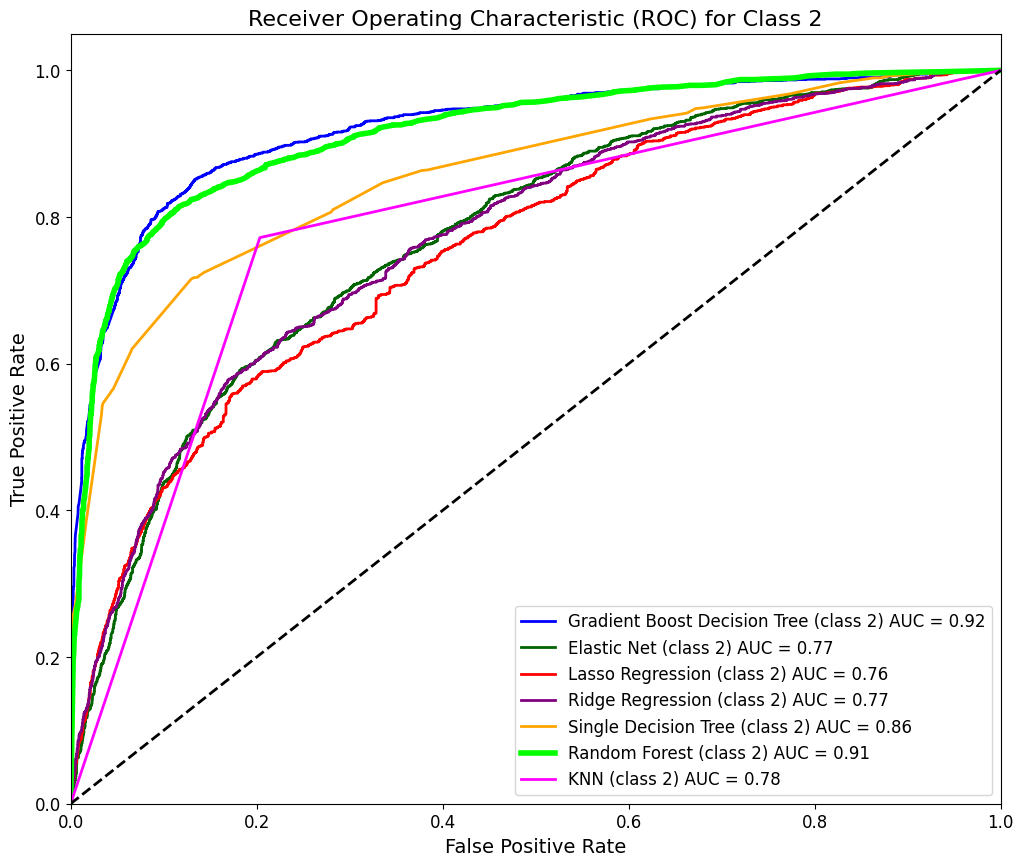

<Figure size 640x480 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# List of model names
model_names = ['Gradient Boost Decision Tree', 'Elastic Net', 'Lasso Regression', 'Ridge Regression', 'Single Decision Tree', 'Random Forest', 'KNN']

# List of true labels and predicted probabilities
y_tests = [y_test, y_test, y_test, y_test, y_test, y_test, y_test]  # True labels for each model
y_pred_probs = [grboost_y_pred_proba, elastic_net_y_pred_proba, log_l1_y_pred_proba, log_l2_y_pred_proba, tree1_y_pred_proba, rf_y_pred_proba, knn_y_pred_proba]  # Predicted probabilities for each model

# Colors for each model
colors = {
    'Gradient Boost Decision Tree': 'blue',
    'Elastic Net': 'darkgreen',
    'Lasso Regression': 'red',
    'Ridge Regression': 'purple',
    'Single Decision Tree': 'orange',
    'Random Forest': 'lime',  # Distinct color for Random Forest
    'KNN': 'magenta'
}

# Number of classes
n_classes = 3

# Binarize the output labels for each class
y_tests_bin = [label_binarize(y, classes=range(n_classes)) for y in y_tests]

plt.figure(figsize=(12, 10))

# Class to focus on
class_index = 2

for model_name, y_test_bin, y_pred_prob in zip(model_names, y_tests_bin, y_pred_probs):
    # Compute ROC curve and ROC area for the specific class
    fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_pred_prob[:, class_index])
    roc_auc = auc(fpr, tpr)
    
    # Set line width and color based on model
    if model_name == 'Random Forest':
        lw = 4  # Thicker line for Random Forest
        color = colors.get(model_name, 'black')  # Color for Random Forest
    else:
        lw = 2  # Default line width
        color = colors.get(model_name, 'black')  # Default color for other models

    # Plot ROC curve for the specific class
    plt.plot(fpr, tpr, lw=lw, color=color, label=f'{model_name} (class {class_index}) AUC = {roc_auc:.2f}')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set axis labels and title with font sizes
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) for Class 2', fontsize=16)

# Adjust the size of the axis ticks and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower right", fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

folder_path = 'ModelOutput'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
img_path = os.path.join(folder_path, 'ROCPlot.png')
plt.savefig(img_path)


In [123]:
grboost_y_pred

array([1, 1, 2, ..., 1, 1, 1])

In [ ]:
grboost_y_pred_proba = grboost.predict_proba(X_test_encoded)  # This should be a 2D array